In [ ]:
import numpy as np

In [ ]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(x=X, y=y)

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

In [ ]:
# Now make predictions with the theta_best
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2,0,15])

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

In [ ]:
lin_reg.predict(X_new)

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [ ]:
theta_best_svd

In [ ]:
np.linalg.pinv(X_b).dot(y)

In [ ]:
eta = 0.1
n_iterations = 10
m = 100

theta = np.random.randn(2, 1)

fig = plt.subplot()
fig.scatter(x=X, y=y)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    fig.plot(theta, theta, 'b-')

In [ ]:
theta

In [ ]:
n_epochs = 50

t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [ ]:
theta

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X **2 + X + 2 + np.random.randn(m, 1)

In [ ]:
plt.scatter(X, y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)
X_poly[0]

In [ ]:
X[0]

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

In [ ]:
y_test = lin_reg.predict(X_poly)

In [ ]:
plt.plot(X, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([('polu_features', PolynomialFeatures(degree=10, include_bias=False)),
                                  ('lin_reg', LinearRegression())])
plot_learning_curves(polynomial_regression, X, y)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)

elastic_net.predict([[1.5]])

In [ ]:
from sklearn.base import clone
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X,y)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error=float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val,y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)




In [ ]:
best_epoch

In [5]:
from sklearn import datasets
import numpy as np 

iris = datasets.load_iris()

In [7]:
X = iris['data'][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int64)



In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [10]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

In [11]:
y_proba = log_reg.predict_proba(X_new)

In [12]:
import matplotlib.pyplot as plt



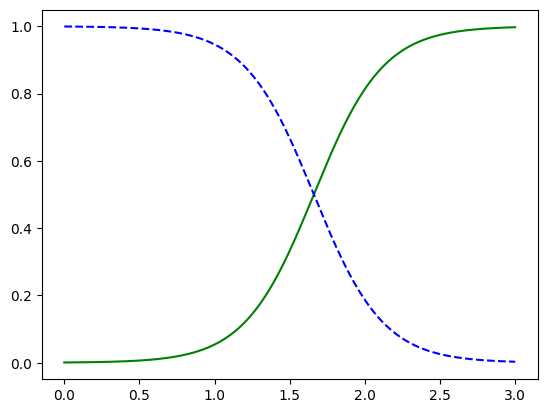

In [14]:
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris vriginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Iris Not vriginica')

In [15]:
X = iris['data'][:, (2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)

softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [16]:
softmax_reg.predict([[5, 2]])

array([2])

In [17]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])